In [2]:
import seaborn as sns
from tdc.multi_pred import DTI
import pandas as pd

# Drug-Target Interaction Prediction

Determining how well a small-molecule drug binds to a new target protein typically involves screening various compounds to gauge their effectiveness. Traditional methods for this rely on costly and time-consuming high-throughput wet-lab experiments. Unfortunately, these methods struggle when handling a large number of candidate compounds due to their resource-intensive nature. To tackle this challenge, drug-target interaction (DTI) prediction tasks employ computational methods that work virtually, using available structural data of compounds and protein amino acid sequences. By doing so, these computational models aim to predict how well a drug interacts with a target protein without the need for expensive lab experiments. Using techniques like machine learning and molecular modeling, these models offer a cost-effective and efficient means to forecast potential drug-target interactions. This advancement in predictive modeling holds great potential for accelerating drug discovery by quickly identifying promising compounds for further experimental exploration, potentially saving time and resources in the early stages of drug development.

# Dataset : KIBA

The KIBA (Kinase Inhibitor Bioactivity) dataset is a specialized dataset curated specifically for studying the interactions between kinase inhibitors and their target kinases. Kinases are a class of enzymes involved in cellular signaling pathways and are significant targets in drug discovery, particularly in cancer treatment and other diseases related to aberrant signaling pathways.Kinases are a class of enzymes involved in cellular signaling pathways and are significant targets in drug discovery, particularly in cancer treatment and other diseases related to aberrant signaling pathway.

References:

[1] Tang J, Szwajda A, Shakyawar S, et al. Making sense of large-scale kinase inhibitor bioactivity data sets: a comparative and integrative analysis. J Chem Inf Model. 2014;54(3):735-743.

[2] Huang, Kexin, et al. “DeepPurpose: a Deep Learning Library for Drug-Target Interaction Prediction” Bioinformatics.

In [3]:
data_K = DTI(name = 'KIBA')

Found local copy...
Loading...
Done!


# 1. Exploração inicial e pré-processamento 

In [4]:
data = data_K.get_data()

In [5]:
data_K.print_stats()
print()
print("Binding affinity mean:", data_K.y.mean())

--- Dataset Statistics ---
2068 unique drugs.
229 unique targets.
117657 drug-target pairs.
--------------------------



Binding affinity mean: 11.720685064259609


### Binding affinity values distribution

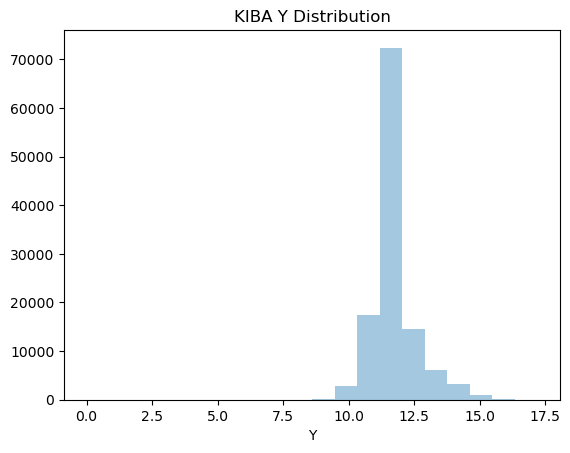

In [6]:
Y_plot = sns.distplot(data.Y, kde=False, bins=20).set_title('KIBA Y Distribution')

Drugs smiles lenght distribution

Text(0.5, 1.0, 'KIBA Drug Length Distribution')

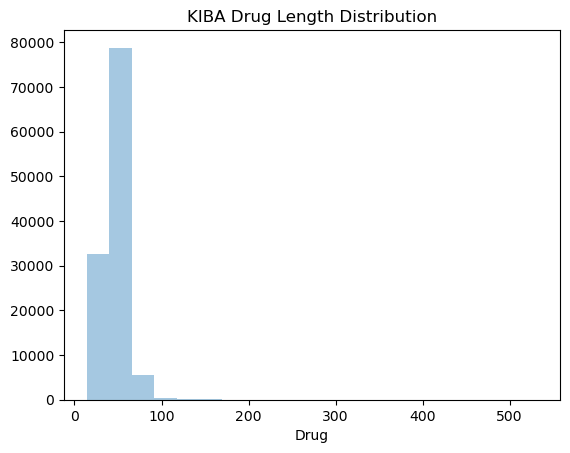

In [7]:
sns.distplot(data.Drug.str.len(), kde=False, bins=20).set_title('KIBA Drug Length Distribution')

Protein aa lengths distribution

Text(0.5, 1.0, 'KIBA Target Length Distribution')

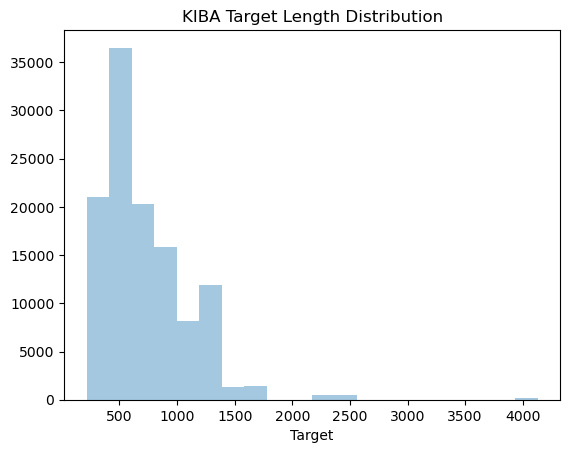

In [8]:
sns.distplot(data.Target.str.len(), kde=False, bins=20).set_title('KIBA Target Length Distribution')

Data binarization - We binarize the y variable (binding affinity) by applying as a treshold the value of 12.1, which, according to literature represents the minimum value where the kinases seem to have some effect on the activity of enzymes. With this, values below the treshold will be represented as "0" and values above the treshold will be represented as "1".


In [9]:
data_binarized = data_K.binarize(threshold = 12.1, order ='ascending') 

Binariztion using threshold 12.1, default, we assume the smaller values are 1 and larger ones is 0, you can change the order by 'binarize(order = 'ascending')'


In [10]:
data_binarized.get_data()

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


In [11]:
data_binarized.get_data().Y.value_counts()

0    95091
1    22566
Name: Y, dtype: int64

The obtained binarized dataset has 95091 DTI with seemingly no inhibition and 22566 with some degree of activity inhibition

In [12]:
df_binarized = data_binarized.get_data(format = 'df')
df_binarized.to_csv('KIBA_binarized.csv', index = False)
df_binarized

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


# Drugs descriptors

In [13]:
descriptors_smiles = pd.read_csv('drugs_descriptors_smiles.csv')

In [14]:
morgan_fingerprints = pd.read_csv('drugs_morgan_fingerprints.csv')

Remove nan

In [15]:
# shape of the dataframes
print(descriptors_smiles.shape, morgan_fingerprints.shape)
# Remove rows where all values are nan
descriptors = descriptors_smiles.dropna(how='all')
# don't forget to drop the same rows from the y column
#### y_descriptors = data['Y'].copy()[descriptors.index] ------- confirmar
y_descriptors = df_binarized['Y'].copy()[descriptors.index] #-------- confirmar

# we do the same for morgan_fingerprints
morgan_fingerprints = morgan_fingerprints.dropna(how='all')
#### y_morgan = data['Y'].copy()[morgan_fingerprints.index] ------- confirmar
y_morgan = df_binarized['Y'].copy()[morgan_fingerprints.index] #-------- confirmar
# as we can see, the shapes are the same, because there was no invalid molecule
descriptors.shape, y_descriptors.shape, morgan_fingerprints.shape, y_morgan.shape

(2068, 209) (2068, 1025)


((2068, 209), (2068,), (2068, 1025), (2068,))

In [16]:
# Checking if any of the descriptors have columns with nan values
descriptors.isna().any().sum(), morgan_fingerprints.isna().any().sum() 

(0, 0)

# Protein Descriptors

In [17]:
protein_descriptors = pd.read_csv('protein_descriptors.csv')
protein_descriptors

,Target,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,...,crosscorr_6,moment,global,profile_0,profile_1,arc_0,arc_1,arc_2,arc_3,arc_4
0,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,431.0,6.168,0.000126,2211,3416,574,640,15,7924,...,-0.039397,0.777903,1.062857,0.000135,0.308740,160,160,80,60,60
1,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,756.0,-14.843,-0.000171,3733,5900,1008,1224,40,13982,...,-0.026423,1.019365,0.821429,0.000031,0.363985,160,300,100,80,60
2,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,745.0,-8.616,-0.000102,3714,5853,985,1149,45,13752,...,-0.044804,0.941998,0.877143,-0.000026,0.374775,180,180,60,60,40
3,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,1210.0,-12.897,-0.000096,5826,9137,1597,1835,85,22017,...,0.052784,1.154790,1.100000,0.000003,0.339588,240,280,60,60,40
4,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,1255.0,-32.426,-0.000235,6004,9333,1633,1880,82,22639,...,0.040026,0.963924,1.142857,-0.000009,0.337303,220,220,80,60,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,MLGTGPAAATTAATTSSNVSVLQQFASGLKSRNEETRAKAAKELQH...,2549.0,-7.013,-0.000024,12731,20074,3428,3862,130,46717,...,-0.038202,1.087857,1.011429,0.000002,0.387740,200,320,80,80,40
225,MVSSQKLEKPIEMGSSEPLPIADGDRRRKKKRRGRATDSLPGKFED...,465.0,-3.844,-0.000075,2227,3519,613,716,22,8344,...,-0.001884,1.035476,0.957143,-0.000040,0.356987,160,200,100,60,60
226,MRHSKRTYCPDWDDKDWDYGKWRSSSSHKRRKRSHSSAQENKRCKY...,484.0,16.713,0.000292,2503,3859,747,750,22,9159,...,0.098283,0.968372,0.944286,0.000219,0.314280,160,340,120,60,40
227,MGDTVVEPAPLKPTSEPTSGPPGNNGGSLLSVITEGVGELSVIDPE...,816.0,-14.527,-0.000159,3983,6286,1086,1277,32,14740,...,-0.058385,0.883325,0.840000,0.000056,0.333261,140,300,60,60,60


# Drug Encondings

# Protein Encodings

In [18]:
protein_encoding = pd.read_csv('protein_encoding.csv')

## Standardization

#### Standardizing descriptors 

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(descriptors_smiles)
scaled_descriptors

ValueError: could not convert string to float: 'COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2'

Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# select features with variance > 0.01
selector = VarianceThreshold(threshold=0.01)
selected_descriptors = selector.fit_transform(scaled_descriptors)
selected_columns = descriptors.columns[selector.get_support()]
selected_descriptors.shape, selected_columns

UMAP (Dimensionality reduction)

In [ ]:
# UMAP
import umap

# create UMAP object
umap_obj = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation', random_state=42)
# fit UMAP
umap_obj.fit(selected_descriptors)

In [ ]:
# plot UMAP
import seaborn as sns

sns.scatterplot(x=umap_obj.embedding_[:, 0], y=umap_obj.embedding_[:, 1], hue=y_descriptors)